# Fig3: Dissecting the structural basis of burst and sustained dynamics through domain swapping

In [1]:
# Fig3: Dissecting the structural basis of burst and sustained dynamics through domain swapping

import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
import arviz as az


In [2]:

df_A = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/101324-k401-titration-rt/2p5TMB-1ulDNA_/output_data/merged_expression_PIV.csv")
df_C_E_G = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/111624-C-E-G-RT/2p5ulTMB-0p5MT-1ulDNA_/output_data/merged_expression_PIV.csv")
df_H = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/output_data/merged_expression_PIV.csv")
df_H = df_H[df_H['condition'].str.contains('Kif3_') & df_H['condition'].str.contains('_1-RT')]

df_D = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/110324-D_titration-RT/2p5TMB-1ulDNA_1/output_data/merged_expression_PIV.csv")

df_B_F = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/111024-B-F-titrations-RT/2p5TMB-1ulDNA_/output_data/combined_expression.csv")

# Change the column names in df_B_F to be lowercase for 'Condition' and 'Subcondition'
df_B_F.rename(columns={'Condition': 'condition', 'Subcondition': 'subcondition'}, inplace=True)

df_ThTr = pd.read_csv("../../../Thomson Lab Dropbox/David Larios/activedrops/main/020124-ThTr-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv")

df_AcSu2 = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/021025-BleSto-AcSu2-titrations/2p5ulTMB-1ulDNA_1/output_data/merged_expression_PIV.csv")

df_DiPu = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/021025-DiPu-titrations/2p5ulTMB-1ulDNA_1/output_data/merged_expression_PIV.csv")

df_HeAl = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/021625-HeAl-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv")


# Merge the two DataFrames into one
df = pd.concat([df_A, df_H, df_C_E_G, df_D, df_B_F, df_ThTr, df_AcSu2, df_DiPu, df_HeAl], ignore_index=True, join='outer')
df


,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Unnamed: 0,frame,...,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h)
0,K401_1p25nM-RT,Rep1,0.0,0.0,0.000000,179.914233,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K401_1p25nM-RT,Rep1,600.0,10.0,0.166667,181.127909,0.051565,1.909813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,K401_1p25nM-RT,Rep1,1200.0,20.0,0.333333,181.868650,0.083037,3.075428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,K401_1p25nM-RT,Rep1,1800.0,30.0,0.500000,182.932426,0.128233,4.749361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K401_1p25nM-RT,Rep1,2400.0,40.0,0.666667,184.062858,0.176261,6.528183,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150639,HeAl_160nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,20.590965,-1.047945e-07,0.000004,113.293994,0.000349,0.000722,4.155914e-20,3.441722e-15,399.8,6.663333
150640,HeAl_1p25nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,14.378549,-7.229753e-07,0.000002,34.239807,0.000109,0.005181,1.704041e-22,2.569826e-14,399.8,6.663333
150641,HeAl_2p5nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,11.316001,-4.709862e-06,-0.000001,-29.315209,0.000084,0.004440,8.287080e-20,2.810620e-14,399.8,6.663333
150642,HeAl_5nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,14.091033,-3.758733e-06,-0.000003,105.622537,0.000308,0.001562,4.510662e-21,1.451744e-14,399.8,6.663333


In [3]:
# Split condition column and extract components
df['protein'] = df['condition'].str.split('_').str[0]

# Replace protein names
df['protein'] = df['protein'].replace({'K401': 'A', 'Kif3': 'H'})

# Extract DNA concentration, removing -RT and handling different formats
df['DNA nM'] = df['condition'].str.split('_').str[1].str.replace('-RT', '').str.replace('p', '.').str.replace('nM', '')

df['kDa'] = df['protein'].apply(lambda x: 78 if x in ['A', 'B', 'C', 'D'] else 93 if x in ['E', 'F', 'G', 'H'] else None)


# Remove -RT from condition column
df['condition'] = df['condition'].str.replace('-RT', '')

# multiply all the values of divergence and vorticity by 1000
df['divergence [1/s]_mean'] = df['divergence [1/s]_mean'] * 1000
df['vorticity [1/s]_mean'] = df['vorticity [1/s]_mean'] * 1000


# save the dataframe
df.to_csv('~/Thomson Lab Dropbox/David Larios/activedrops/main/all/chimeras_titrations.csv', index=True)
df


,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Unnamed: 0,frame,...,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h),protein,DNA nM,kDa
0,K401_1p25nM,Rep1,0.0,0.0,0.000000,179.914233,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
1,K401_1p25nM,Rep1,600.0,10.0,0.166667,181.127909,0.051565,1.909813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
2,K401_1p25nM,Rep1,1200.0,20.0,0.333333,181.868650,0.083037,3.075428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
3,K401_1p25nM,Rep1,1800.0,30.0,0.500000,182.932426,0.128233,4.749361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
4,K401_1p25nM,Rep1,2400.0,40.0,0.666667,184.062858,0.176261,6.528183,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150639,HeAl_160nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,113.293994,0.000349,0.000722,4.155914e-20,3.441722e-15,399.8,6.663333,HeAl,160,NaN
150640,HeAl_1p25nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,34.239807,0.000109,0.005181,1.704041e-22,2.569826e-14,399.8,6.663333,HeAl,1.25,NaN
150641,HeAl_2p5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,-29.315209,0.000084,0.004440,8.287080e-20,2.810620e-14,399.8,6.663333,HeAl,2.5,NaN
150642,HeAl_5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,105.622537,0.000308,0.001562,4.510662e-21,1.451744e-14,399.8,6.663333,HeAl,5,NaN


In [4]:
df['condition'].unique()

array(['K401_1p25nM', 'K401_2p5nM', 'K401_5nM', 'K401_10nM', 'K401_20nM',
       'K401_40nM', 'K401_80nM', 'K401_160nM', 'Kif3_1p25nM_1',
       'Kif3_2p5nM_1', 'Kif3_5nM_1', 'Kif3_10nM_1', 'Kif3_20nM_1',
       'Kif3_40nM_1', 'Kif3_80nM_1', 'Kif3_160nM_1', 'C_1p25nM',
       'C_2p5nM', 'C_5nM', 'C_10nM', 'C_20nM', 'C_40nM', 'C_80nM',
       'C_160nM', 'E_1p25nM', 'E_2p5nM', 'E_5nM', 'E_10nM', 'E_20nM',
       'E_40nM', 'E_80nM', 'E_160nM', 'G_1p25nM', 'G_2p5nM', 'G_5nM',
       'G_10nM', 'G_20nM', 'G_40nM', 'G_80nM', 'G_160nM', 'D_1p25nM',
       'D_2p5nM', 'D_5nM', 'D_10nM', 'D_20nM', 'D_40nM', 'D_80nM',
       'D_160nM', 'B_1p25nM', 'B_2p5nM', 'B_5nM', 'B_10nM', 'B_20nM',
       'B_40nM', 'B_80nM', 'B_160nM', 'F_1p25nM', 'F_2p5nM', 'F_5nM',
       'F_10nM', 'F_20nM', 'F_40nM', 'F_80nM', 'F_160nM', 'ThTr_1p25nM',
       'ThTr_2p5nM', 'ThTr_5nM', 'ThTr_10nM', 'ThTr_20nM', 'ThTr_40nM',
       'ThTr_80nM', 'ThTr_160nM', 'AcSu2_1p25nM', 'AcSu2_2p5nM',
       'AcSu2_5nM', 'AcSu2_10nM', 'A

In [5]:
import matplotlib.pyplot as plt

# Get the default color cycle from the current style
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary mapping proteins to default colors
protein_color_map = {protein: color for protein, color in zip('ABCDEFGH', default_colors)}

print(protein_color_map)

{'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728', 'E': '#9467bd', 'F': '#8c564b', 'G': '#e377c2', 'H': '#7f7f7f'}


In [9]:
def filter_and_replace_values(df, filters_list):
    """
    Filters dataframe for multiple protein/DNA concentration combinations,
    then replaces velocity values with NaN where time is outside the specified interval.
    
    Parameters:
    - df: DataFrame containing the data
    - filters_list: List of tuples, each containing (protein_name, dna_concentration, min_time_minutes, max_time_minutes)
    
    Returns:
    - Modified copy of the dataframe
    """
    # Create a copy to avoid SettingWithCopyWarning
    df_copy = df.copy()
    
    # Get velocity columns
    velocity_columns = list(df.columns[10:-5])
    
    # Apply each filter in the list
    for protein_name, dna_concentration, min_time_minutes, max_time_minutes in filters_list:
        # Create mask for the specified protein and DNA concentration
        mask = (df_copy['protein'] == protein_name) & (df_copy['DNA nM'] == dna_concentration)
        
        # Convert time thresholds to seconds
        min_time_seconds = min_time_minutes * 60
        max_time_seconds = max_time_minutes * 60
        
        # Replace velocity values with NaN where time is outside the interval
        for col in velocity_columns:
            if col in df_copy.columns:
                df_copy.loc[(mask) & ((df_copy['time (s)'] < min_time_seconds) | 
                                      (df_copy['time (s)'] > max_time_seconds)), col] = np.nan
    
    return df_copy

# Define filters as a list of tuples: (protein_name, dna_concentration, min_time_minutes, max_time_minutes)
filters = [
    ('ThTr', '80', 0, 840),
    ('HeAl', '160', 6, 36),
    ('HeAl', '80', 0, 36),
    ('HeAl', '40', 0, 36),
    ('HeAl', '20', 0, 36),
    ('HeAl', '10', 3, 120),
    ('HeAl', '5', 3, 120),
    ('HeAl', '2.5', 3, 210),
    ('HeAl', '1.25', 3, 210),

]

# Apply all filters at once
df_copy = filter_and_replace_values(df, filters)

# Display the modified dataframe
df_copy

,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Unnamed: 0,frame,...,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h),protein,DNA nM,kDa
0,K401_1p25nM,Rep1,0.0,0.0,0.000000,179.914233,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
1,K401_1p25nM,Rep1,600.0,10.0,0.166667,181.127909,0.051565,1.909813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
2,K401_1p25nM,Rep1,1200.0,20.0,0.333333,181.868650,0.083037,3.075428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
3,K401_1p25nM,Rep1,1800.0,30.0,0.500000,182.932426,0.128233,4.749361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
4,K401_1p25nM,Rep1,2400.0,40.0,0.666667,184.062858,0.176261,6.528183,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150639,HeAl_160nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,399.8,6.663333,HeAl,160,NaN
150640,HeAl_1p25nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,399.8,6.663333,HeAl,1.25,NaN
150641,HeAl_2p5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,399.8,6.663333,HeAl,2.5,NaN
150642,HeAl_5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,399.8,6.663333,HeAl,5,NaN


In [131]:
# # Specify which plots to include. For instance, include all:
# plots_to_include = [
#     'Protein_Concentration_vs_Time',
#     'Mean_Velocity_vs_Protein_Concentration',
#     'Mean_Power_vs_Time',
#     # 'Total_Work_vs_DNA_Concentration',
#     'Mean_Velocity_vs_Time',
#     'Correlation_Length_vs_Time',
#     # 'Activation_Onset_vs_Protein_Concentration',
#     # 'Protein_Concentration_vs_Max_Velocity',
#     'Protein_Concentration_Rate_of_Change',
#     # 'Motion_Duration_vs_DNA_Concentration',
#     # 'Total_Work_vs_Activation_Onset',
#     # 'Correlation_Length_vs_Velocity',
#     'Vorticity_vs_Time',
#     'Divergence_vs_Time',
#     'Vector_Direction_vs_Time'
# ]
# # To generate combined plots (grid) set combined_plots=True and set grid_size as desired.
# generate_plots_master(df_copy, proteins, dna_concentrations=titrations[:],
#                         output_dir='../../../Downloads/Selected_Proteins_Plots',
#                         velocity_threshold=0.2, time_unit='h', colored_DNAnM=False,
#                         combined_plots=True, display_dna_text=True,
#                         plots_to_include=plots_to_include, grid_size=(3,3), fig_size=(6,6))


Titrations: [160, 80, 40, 20, 10, 5, 2.5, 1.25]


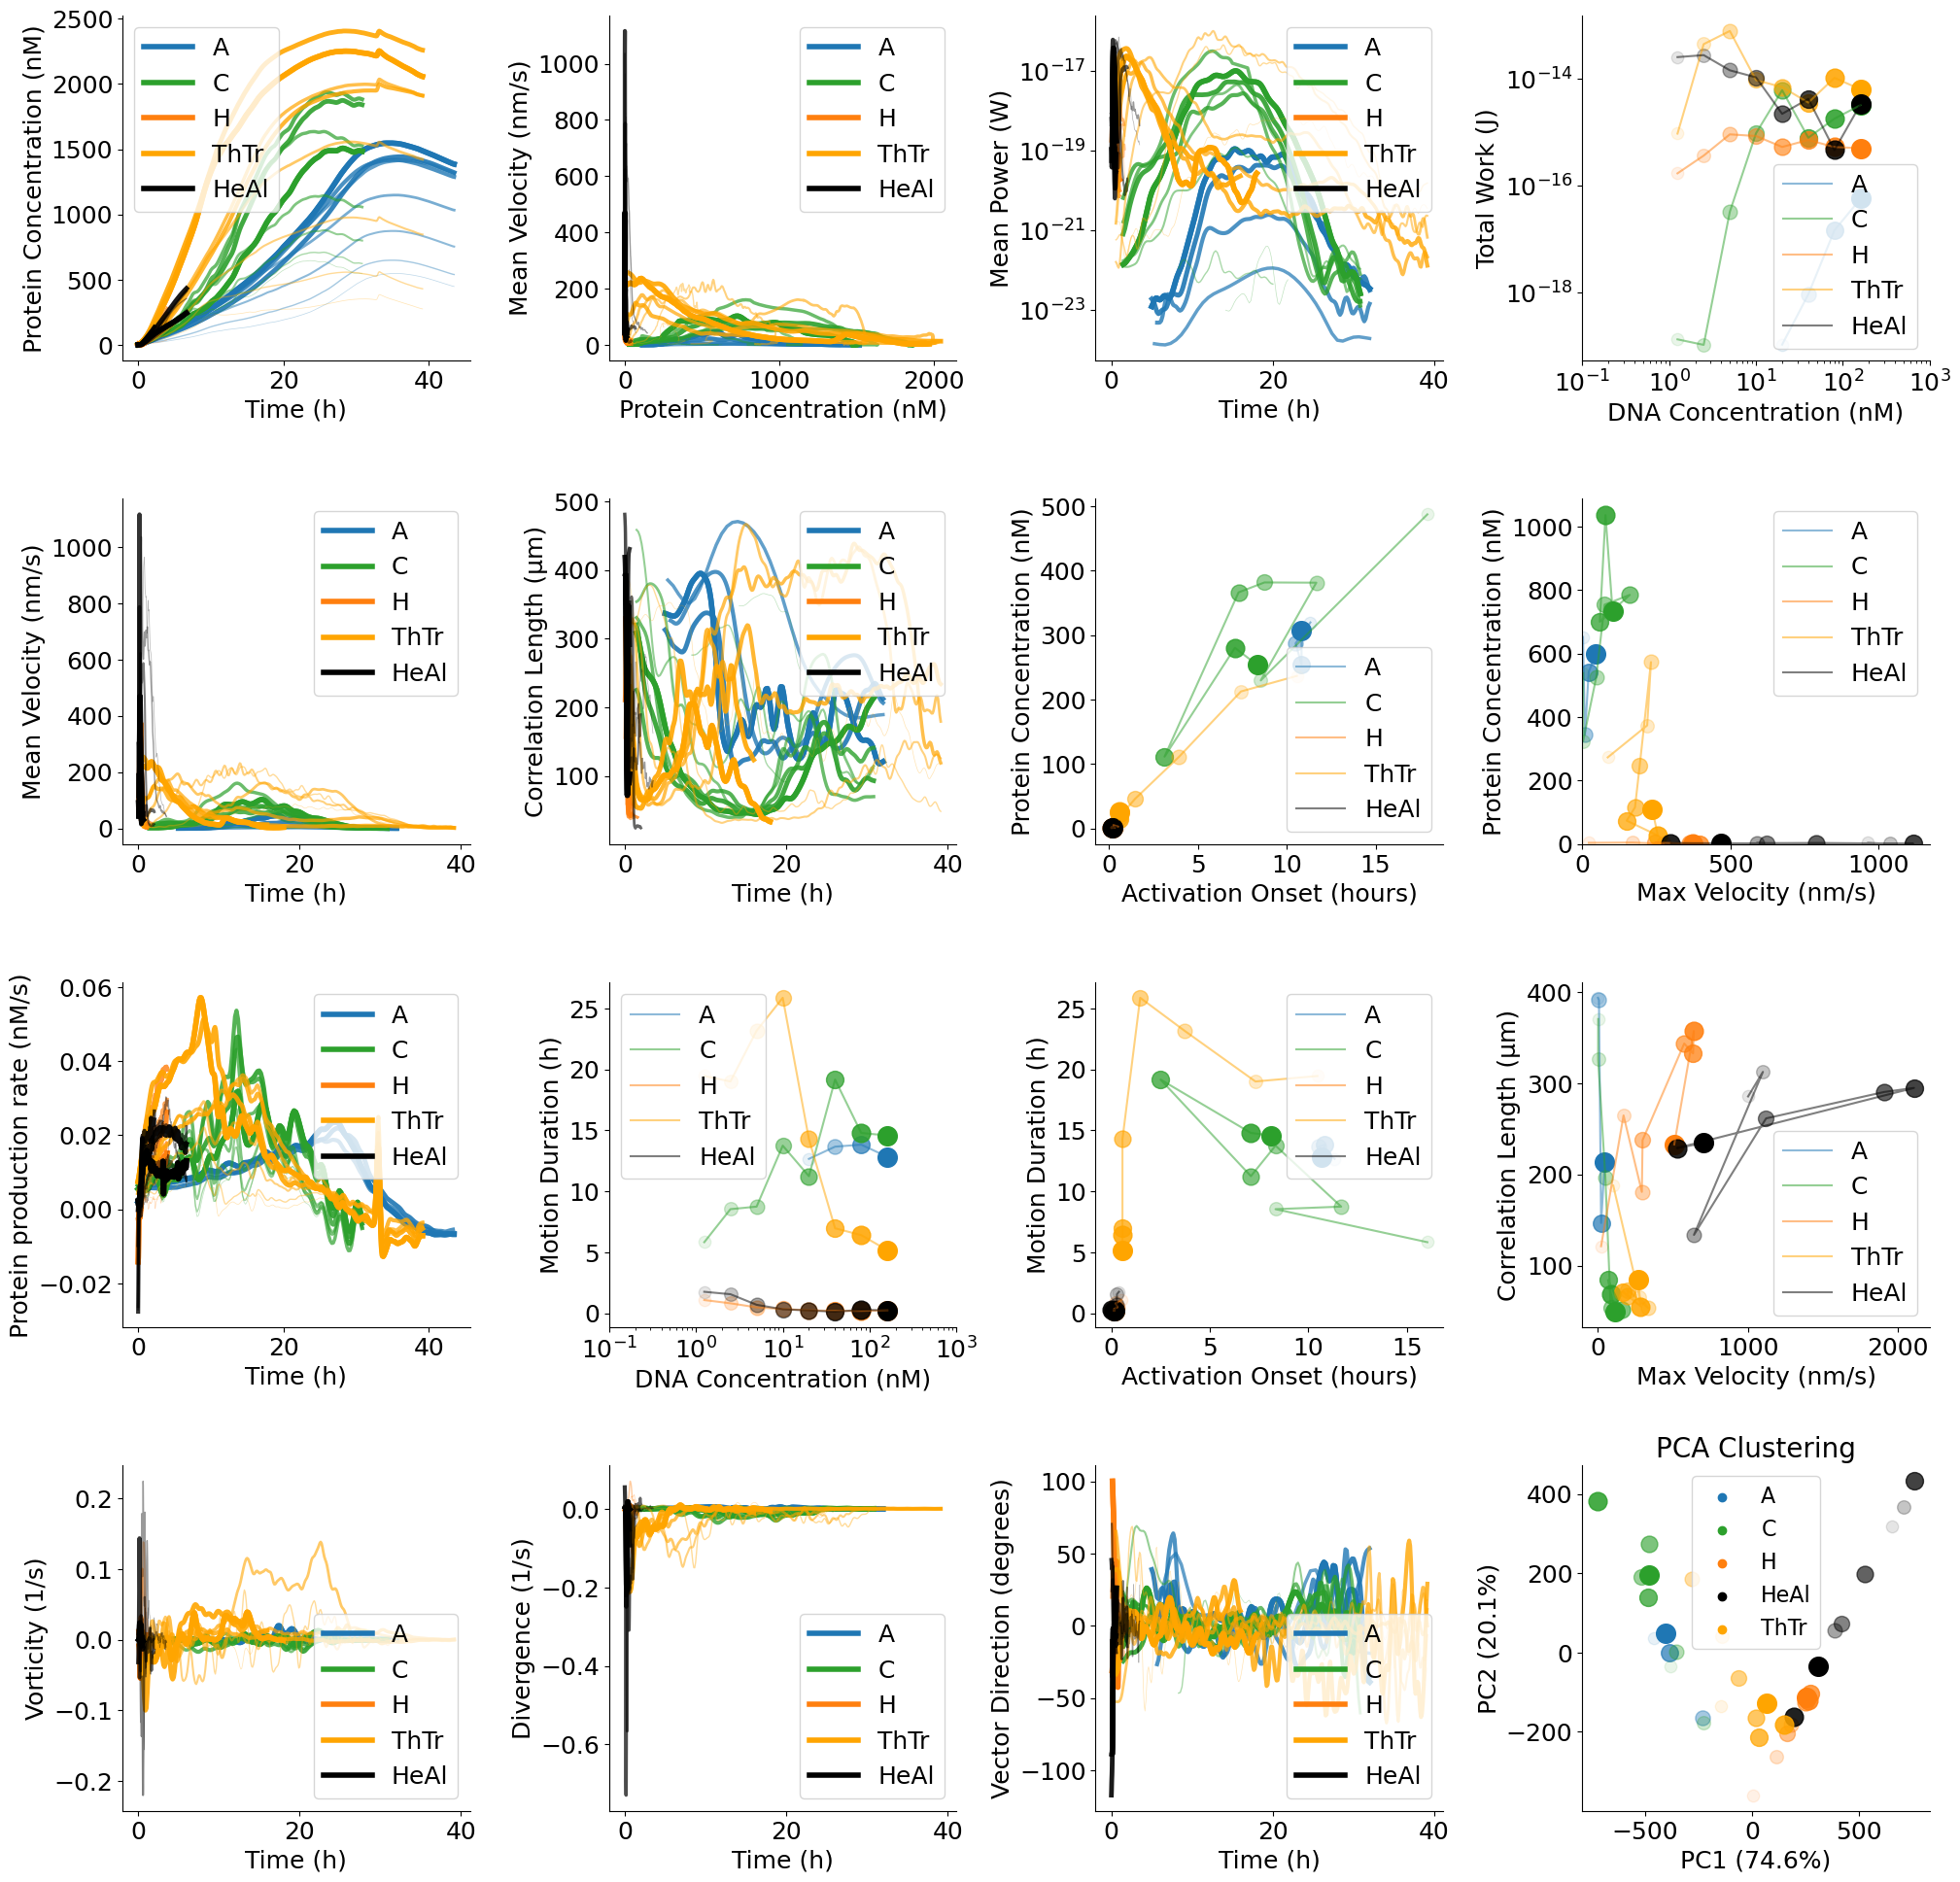

In [155]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FuncFormatter, LogLocator
from sklearn.decomposition import PCA

# ------------------------------
# Plotting functions (using a list of proteins)
# ------------------------------

def plot_protein_concentration_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                        color_map, velocity_threshold, time_unit, colored_DNAnM,
                                        display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    # Use full time range
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['Protein Concentration_nM', 'Time_h'])
            if df_filtered.empty:
                continue
            smoothed_conc = gaussian_filter1d(df_filtered['Protein Concentration_nM'], sigma=1)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered['Time_h'], smoothed_conc,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_filtered['Time_h'].iloc[-1], smoothed_conc[-1],
                        f'{dna_conc}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered['Time_h'], smoothed_conc, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel('Time (h)', fontsize=18)
    ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_power_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['power [W]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_power = gaussian_filter1d(df_filtered['power [W]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_power,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_power.argmax()
                t_peak = df_filtered[time_col].iloc[idx]
                p_peak = smoothed_power[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, p_peak, f'{dna_conc}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_power, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Mean Power (W)', fontsize=18)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_velocity_vs_protein_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                  display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['velocity magnitude [m/s]_mean', 'Protein Concentration_nM'])
            if df_filtered.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered['Protein Concentration_nM'], smoothed_vel,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_vel.argmax()
                x_peak = df_filtered['Protein Concentration_nM'].iloc[idx]
                y_peak = smoothed_vel[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(x_peak, y_peak, f'{dna_conc}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered['Protein Concentration_nM'], smoothed_vel, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel('Protein Concentration (nM)', fontsize=18)
    ax.set_ylabel('Mean Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_total_work_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                          color_map, velocity_threshold, time_unit, colored_DNAnM,
                                          display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        if protein in df['protein'].unique():
            pdata = df[df['protein'] == protein]
            dnas = []
            works = []
            for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
                sub = pdata[pdata['DNA nM'] == str(dna)]
                work_series = sub['work [J]_mean'].dropna()
                if not work_series.empty:
                    dnas.append(float(dna))
                    works.append(work_series.iloc[-1])
            if not works:
                continue
            alphas = np.linspace(1.0, 0.1, len(dnas))
            sizes = np.linspace(200, 80, len(dnas))
            for i, (x, y, alpha, size) in enumerate(zip(dnas, works, alphas, sizes)):
                ax.scatter(x, y, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(x, y, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, works, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA Concentration (nM)', fontsize=18)
    ax.set_ylabel('Total Work (J)', fontsize=18)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='lower right', fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_velocity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                               color_map, velocity_threshold, time_unit, colored_DNAnM,
                               display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                          .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_vel,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_vel.argmax()
                t_peak = df_filtered[time_col].iloc[idx]
                v_peak = smoothed_vel[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_vel, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Mean Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                    color_map, velocity_threshold, time_unit, colored_DNAnM,
                                    display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                          .dropna(subset=['correlation length [m]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_corr = gaussian_filter1d(df_filtered['correlation length [m]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_corr * 1e6,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_filtered[time_col].iloc[-1], smoothed_corr[-1] * 1e6,
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_corr * 1e6, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_activation_onset_vs_protein_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                     color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                     display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        activation_onsets = []
        protein_concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=1)
            df_sub = df_sub.copy()
            df_sub['smoothed_velocity'] = smoothed_vel
            peak_vel = df_sub['smoothed_velocity'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smoothed_velocity'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                conc = above['Protein Concentration_nM'].iloc[0]
                activation_onsets.append(onset)
                protein_concs.append(conc)
                dna_labels.append(f'{dna}nM')
        if activation_onsets:
            alphas = np.linspace(1.0, 0.1, len(activation_onsets))
            sizes = np.linspace(200, 80, len(activation_onsets))
            for i, (onset, conc, alpha, size, label) in enumerate(zip(activation_onsets, protein_concs, alphas, sizes, dna_labels)):
                ax.scatter(onset, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(onset, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(activation_onsets, protein_concs, color=color_map.get(protein, 'black'),
                    alpha=0.5, label=protein)
    ax.set_xlabel('Activation Onset (minutes)' if time_unit == 'min' else 'Activation Onset (hours)', fontsize=18)
    ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_vs_max_velocity(ax, df, proteins, dna_concentrations, time_col,
                                                 color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                 display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_vels = []
        concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', 'Protein Concentration_nM'])
            if df_sub.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            idx = smoothed_vel.argmax()
            max_vels.append(smoothed_vel[idx])
            concs.append(df_sub['Protein Concentration_nM'].iloc[idx])
            if float(dna).is_integer():
                dna_labels.append(f'{int(dna)}nM')
            else:
                dna_labels.append(f'{dna}nM')
        if max_vels:
            alphas = np.linspace(1.0, 0.1, len(max_vels))
            sizes = np.linspace(200, 80, len(max_vels))
            for i, (vel, conc, alpha, size, label) in enumerate(zip(max_vels, concs, alphas, sizes, dna_labels)):
                ax.scatter(vel, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(vel, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_vels, concs, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Velocity (nm/s)', fontsize=18)
    ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_rate_of_change(ax, df, proteins, dna_concentrations, time_col,
                                                color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['Protein Concentration_nM', time_col])
            if df_sub.empty:
                continue
            df_sub = df_sub.copy()
            df_sub['dC/dt'] = df_sub['Protein Concentration_nM'].diff() / df_sub['time (s)'].diff()
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            smooth_dcdt = gaussian_filter1d(df_sub['dC/dt'].fillna(0), sigma=2)
            ax.plot(df_sub['time (h)'], smooth_dcdt,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                idx = np.argmax(smooth_dcdt)
                t_peak = df_sub['time (h)'].iloc[idx]
                val_peak = smooth_dcdt[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, val_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub['time (h)'], smooth_dcdt,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw, label=protein)
    ax.set_xlabel('Time (h)', fontsize=18)
    ax.set_ylabel('Protein production rate (nM/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_motion_duration_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                               color_map, velocity_threshold, time_unit, colored_DNAnM,
                                               display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        xs = []
        durations = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            df_sub = df_sub.copy()
            df_sub['smooth_vel'] = smooth_vel
            peak_vel = df_sub['smooth_vel'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smooth_vel'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                dur = above[time_col].iloc[-1] - onset
                xs.append(float(dna))
                durations.append(dur)
        if durations:
            alphas = np.linspace(1.0, 0.1, len(durations))
            sizes = np.linspace(200, 80, len(durations))
            for i, (x, dur, alpha, size) in enumerate(zip(xs, durations, alphas, sizes)):
                ax.scatter(x, dur, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(x, dur, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(xs, durations, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA Concentration (nM)', fontsize=18)
    ax.set_ylabel(f'Motion Duration ({time_unit})', fontsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_motion_duration_vs_activation_onset(ax, df, proteins, dna_concentrations, time_col,
                                             color_map, velocity_threshold, time_unit, colored_DNAnM,
                                             display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        onsets = []
        durations = []
        labels = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            df_sub = df_sub.copy()
            df_sub['smooth_vel'] = smooth_vel
            peak_vel = df_sub['smooth_vel'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smooth_vel'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                dur = above[time_col].iloc[-1] - onset
                onsets.append(onset)
                durations.append(dur)
                labels.append(f'{dna}nM')
        if onsets:
            alphas = np.linspace(1.0, 0.1, len(onsets))
            sizes = np.linspace(200, 80, len(onsets))
            for i, (o, d, alpha, size, label) in enumerate(zip(onsets, durations, alphas, sizes, labels)):
                ax.scatter(o, d, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(o, d, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(onsets, durations, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Activation Onset (minutes)' if time_unit == 'min' else 'Activation Onset (hours)', fontsize=18)
    ax.set_ylabel(f'Motion Duration ({time_unit})', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_velocity(ax, df, proteins, dna_concentrations, time_col,
                                        color_map, velocity_threshold, time_unit, colored_DNAnM,
                                        display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        corr_lengths = []
        max_vels = []
        xs = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['correlation length [m]_mean', 'velocity magnitude [m/s]_mean'])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            idx = smooth_vel.argmax()
            corr = df_sub['correlation length [m]_mean'].iloc[idx] * 1e6
            vel = smooth_vel[idx] * 1e9
            corr_lengths.append(corr)
            max_vels.append(vel)
            xs.append(float(dna))
        if corr_lengths:
            alphas = np.linspace(1.0, 0.1, len(corr_lengths))
            sizes = np.linspace(200, 80, len(corr_lengths))
            for i, (v, c, x, alpha, size) in enumerate(zip(max_vels, corr_lengths, xs, alphas, sizes)):
                ax.scatter(v, c, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(v, c, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(max_vels, corr_lengths, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Velocity (nm/s)', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vorticity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                           color_map, velocity_threshold, time_unit, colored_DNAnM,
                           display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['vorticity [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vort = gaussian_filter1d(df_sub['vorticity [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_vort,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_vort.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_vort[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_vort, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vorticity (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_divergence_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['divergence [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_div = gaussian_filter1d(df_sub['divergence [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_div,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_div.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_div[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_div, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Divergence (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vector_direction_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                  display_dna_text, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['vector direction [degrees]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_dir = gaussian_filter1d(df_sub['vector direction [degrees]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_dir,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_sub[time_col].iloc[-1], smooth_dir[-1],
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_dir, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vector Direction (degrees)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=18)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


# New Plot: PCA Clustering with Gradient for each DNA concentration per protein
def plot_PCA_clusters(ax, df, proteins, dna_concentrations, time_col,
                      color_map, velocity_threshold, time_unit, colored_DNAnM,
                      display_dna_text, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA concentration) combination, computes:
      - Maximum velocity (nm/s)
      - Protein concentration at max velocity
      - Total work (last valid work [J]_mean)
      - Correlation length at max velocity (µm)
      - Activation onset (first time smoothed velocity exceeds threshold)
      - Motion duration (time difference between last and first time above threshold)
      
    Performs PCA on these features and plots the first two principal components.
    Within each protein, a gradient of alphas and marker sizes is applied.
    """
    new_fig = False
    feature_list = []
    labels = []      # DNA concentration label
    prot_labels = [] # protein label
    for protein in proteins:
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))]
            if sub.empty:
                continue
            sub = sub.dropna(subset=['velocity magnitude [m/s]_mean', 
                                      'Protein Concentration_nM', 
                                      'work [J]_mean', 
                                      'correlation length [m]_mean', time_col])
            if sub.empty:
                continue
            smooth_vel = gaussian_filter1d(sub['velocity magnitude [m/s]_mean'], sigma=2)
            idx_max = np.argmax(smooth_vel)
            max_vel = smooth_vel[idx_max] * 1e9  # nm/s
            prot_conc_at_max = sub['Protein Concentration_nM'].iloc[idx_max]
            total_work = sub['work [J]_mean'].dropna().iloc[-1]
            corr_length = sub['correlation length [m]_mean'].iloc[idx_max] * 1e6
            thresh = velocity_threshold * smooth_vel[idx_max]
            above = sub[smooth_vel >= thresh]
            if above.empty:
                continue
            activation_onset = above[time_col].iloc[0]
            motion_duration = above[time_col].iloc[-1] - activation_onset
            features = [max_vel, prot_conc_at_max, total_work, corr_length, activation_onset, motion_duration]
            feature_list.append(features)
            labels.append(f'{dna}nM')
            prot_labels.append(protein)
    if not feature_list:
        print("No data available for PCA.")
        return
    X = np.array(feature_list)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    explained = pca.explained_variance_ratio_
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
    # Group points by protein so we can assign gradients within each group.
    unique_prots = sorted(list(set(prot_labels)))
    for prot in unique_prots:
        indices = [i for i, p in enumerate(prot_labels) if p == prot]
        group_len = len(indices)
        group_alphas = np.linspace(1.0, 0.1, group_len)
        group_sizes = np.linspace(200, 80, group_len)
        # Since we appended in descending DNA order, the indices are already in that order.
        for j, idx in enumerate(indices):
            x, y = X_pca[idx]
            ax.scatter(x, y, color=color_map.get(prot, 'black'),
                       s=group_sizes[j], alpha=group_alphas[j])
            if display_dna_text:
                ax.text(x, y, labels[idx], fontsize=12, ha='right', color=color_map.get(prot, 'black'))
    ax.set_xlabel(f'PC1 ({explained[0]*100:.1f}%)', fontsize=18)
    ax.set_ylabel(f'PC2 ({explained[1]*100:.1f}%)', fontsize=18)
    ax.set_title('PCA Clustering', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Create a legend for proteins
    for prot in unique_prots:
        ax.scatter([], [], color=color_map.get(prot, 'black'), label=prot)
    ax.legend(fontsize=16)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


# ------------------------------
# Master function
# ------------------------------

def generate_plots_master(df, proteins, dna_concentrations, output_dir,
                          velocity_threshold=0.2, time_unit='h', colored_DNAnM=True,
                          combined_plots=False, display_dna_text=True,
                          plots_to_include=None, grid_size=(3,5), fig_size=(6,6)):
    """
    Generates selected plots from the DataFrame.
    
    Parameters:
      df: DataFrame with experimental data.
      proteins: list of proteins to plot.
      dna_concentrations: list of DNA concentrations (nM).
      output_dir: directory to save plots.
      velocity_threshold: threshold for velocity-dependent computations.
      time_unit: 'min' or 'h'.
      colored_DNAnM: flag to color DNA labels by protein.
      combined_plots: if True, all plots are combined in one grid.
      display_dna_text: if True, add DNA concentration labels on the plots.
      plots_to_include: list of keys for which plots to produce.
      grid_size: tuple (rows, cols) for combined plots.
      fig_size: size (width, height) for each individual plot.
    """
    color_map = {
        'A': '#1f77b4', 'B': '#7f7f7f', 'C': '#2ca02c', 'D': '#d62728',
        'E': '#9467bd', 'F': '#8c564b', 'G': '#e377c2', 'H': '#ff7f0e',
        'ThTr': 'orange', 'AcSu2': '#d62728', 'DiPu': '#9467bd', 'Blesto': '#8c564b'
    }
    time_col = 'Time_min' if time_unit == 'min' else 'Time_h'
    proteins_str = '_'.join(proteins)
    dna_output_dir = os.path.join(output_dir, f'{proteins_str}_Full_Range')
    os.makedirs(dna_output_dir, exist_ok=True)
    
    plot_functions = {
        'Protein_Concentration_vs_Time': plot_protein_concentration_vs_time,
        'Mean_Velocity_vs_Protein_Concentration': plot_mean_velocity_vs_protein_concentration,
        'Mean_Power_vs_Time': plot_mean_power_vs_time,
        'Total_Work_vs_DNA_Concentration': plot_total_work_vs_dna_concentration,
        'Mean_Velocity_vs_Time': plot_mean_velocity_vs_time,
        'Correlation_Length_vs_Time': plot_correlation_length_vs_time,
        'Activation_Onset_vs_Protein_Concentration': plot_activation_onset_vs_protein_concentration,
        'Protein_Concentration_vs_Max_Velocity': plot_protein_concentration_vs_max_velocity,
        'Protein_Concentration_Rate_of_Change': plot_protein_concentration_rate_of_change,
        'Motion_Duration_vs_DNA_Concentration': plot_motion_duration_vs_dna_concentration,
        'Motion_Duration_vs_Activation_Onset': plot_motion_duration_vs_activation_onset,
        'Correlation_Length_vs_Velocity': plot_correlation_length_vs_velocity,
        'Vorticity_vs_Time': plot_vorticity_vs_time,
        'Divergence_vs_Time': plot_divergence_vs_time,
        'Vector_Direction_vs_Time': plot_vector_direction_vs_time,
        'PCA_Clusters': plot_PCA_clusters
    }
    plot_filenames = {
        'Protein_Concentration_vs_Time': 'Protein_Concentration_vs_Time.svg',
        'Mean_Power_vs_Time': 'Mean_Power_vs_Time.svg',
        'Mean_Velocity_vs_Protein_Concentration': 'Mean_Velocity_vs_Protein_Concentration.svg',
        'Total_Work_vs_DNA_Concentration': 'Total_Work_vs_DNA_Concentration.svg',
        'Mean_Velocity_vs_Time': 'Mean_Velocity_vs_Time.svg',
        'Correlation_Length_vs_Time': 'Correlation_Length_vs_Time.svg',
        'Activation_Onset_vs_Protein_Concentration': 'Activation_Onset_vs_Protein_Concentration.svg',
        'Protein_Concentration_vs_Max_Velocity': 'Protein_Concentration_vs_Max_Velocity.svg',
        'Protein_Concentration_Rate_of_Change': 'Protein_Concentration_Rate_of_Change.svg',
        'Motion_Duration_vs_DNA_Concentration': 'Motion_Duration_vs_DNA_Concentration.svg',
        'Motion_Duration_vs_Activation_Onset': 'Motion_Duration_Work_vs_Activation_Onset.svg',
        'Correlation_Length_vs_Velocity': 'Correlation_Length_vs_Velocity.svg',
        'Vorticity_vs_Time': 'Vorticity_vs_Time.svg',
        'Divergence_vs_Time': 'Divergence_vs_Time.svg',
        'Vector_Direction_vs_Time': 'Vector_Direction_vs_Time.svg',
        'PCA_Clusters': 'PCA_Clusters.svg'
    }
    if plots_to_include is None:
        plots_to_include = list(plot_functions.keys())
    
    if combined_plots:
        rows, cols = grid_size
        fig, axes = plt.subplots(rows, cols, figsize=(cols * fig_size[0], rows * fig_size[1]),
                                 gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
        axes = axes.flatten()
        current_ax_index = 0
    
    for key, func in plot_functions.items():
        if key in plots_to_include:
            if combined_plots:
                ax = axes[current_ax_index]
                current_ax_index += 1
            else:
                ax = None
            func(ax, df, proteins, dna_concentrations, time_col,
                 color_map, velocity_threshold, time_unit, colored_DNAnM, display_dna_text,
                 dna_output_dir, plot_filenames[key], fig_size)
    if combined_plots:
        combined_filename = os.path.join(dna_output_dir, 'Combined_Plots.svg')
        fig.savefig(combined_filename, dpi=500)
        plt.show()


# ------------------------------
# Example usage
# ------------------------------

if __name__ == '__main__':
    # Suppose df_copy is your DataFrame loaded previously.
    titrations = [160 / (2 ** i) for i in range(11)]
    titrations = [int(t) if t.is_integer() else t for t in titrations][:8]
    print("Titrations:", titrations)
    
    plots_to_include = [
        'Protein_Concentration_vs_Time',
        'Mean_Power_vs_Time',
        'Mean_Velocity_vs_Protein_Concentration',
        'Total_Work_vs_DNA_Concentration',
        'Mean_Velocity_vs_Time',
        'Correlation_Length_vs_Time',
        'Activation_Onset_vs_Protein_Concentration',
        'Protein_Concentration_vs_Max_Velocity',
        'Protein_Concentration_Rate_of_Change',
        'Motion_Duration_vs_DNA_Concentration',
        'Motion_Duration_vs_Activation_Onset',
        'Correlation_Length_vs_Velocity',
        'Vorticity_vs_Time',
        'Divergence_vs_Time',
        'Vector_Direction_vs_Time',
        'PCA_Clusters'
    ]
    
    filters = [
        ('A', '160', 300, 32*60),
        ('A', '80', 300, 32*60),
        ('A', '40', 340, 32*60),
        ('A', '20', 300, 32*60),
        ('C', '160', 80, 32*60),
        ('C', '80', 80, 32*60),
        ('C', '40', 80, 32*60),
        ('C', '20', 80, 32*60),
        ('C', '10', 80, 32*60),
        ('C', '5', 80, 32*60),
        ('C', '2.5', 500, 20*60),
        ('C', '1.25', 14*60, 22*60),
        ('H', '160', 8, 60),
        ('H', '80', 2, 60),
        ('H', '40', 7, 60),
        ('H', '20', 2, 60),
        ('H', '10', 8, 100),
        ('H', '5', 10, 100),
        ('H', '2.5', 10, 100),
        ('H', '1.25', 30, 100),
        ('ThTr', '160', 30, 18*60),
        ('ThTr', '80', 30, 16*60),
        ('ThTr', '40', 30, 42*60),
        ('ThTr', '20', 30, 6000),
        ('ThTr', '10', 30, 6000),
        ('ThTr', '5', 30, 6000),
        ('ThTr', '2.5', 30, 6000),
        ('ThTr', '1.25', 30, 6000),
        ('HeAl', '160', 6, 36),
        ('HeAl', '80', 0, 36),
        ('HeAl', '40', 0, 36),
        ('HeAl', '20', 0, 36),
        ('HeAl', '10', 3, 120),
        ('HeAl', '5', 3, 120),
        ('HeAl', '2.5', 3, 210),
        ('HeAl', '1.25', 3, 210),
    ]
    
    proteins = ['A', 'C', 'H', 'ThTr', 'HeAl']
    
    # Assume filter_and_replace_values is defined elsewhere.
    df_copy = filter_and_replace_values(df, filters)
    
    generate_plots_master(df_copy, proteins, dna_concentrations=titrations,
                          output_dir='../../../Downloads/Selected_Proteins_Plots',
                          velocity_threshold=0.3, time_unit='h', colored_DNAnM=False,
                          combined_plots=True, display_dna_text=False,
                          plots_to_include=plots_to_include, grid_size=(4,4), fig_size=(6,6))

Titrations: [160, 80, 40, 20, 10, 5, 2.5, 1.25]


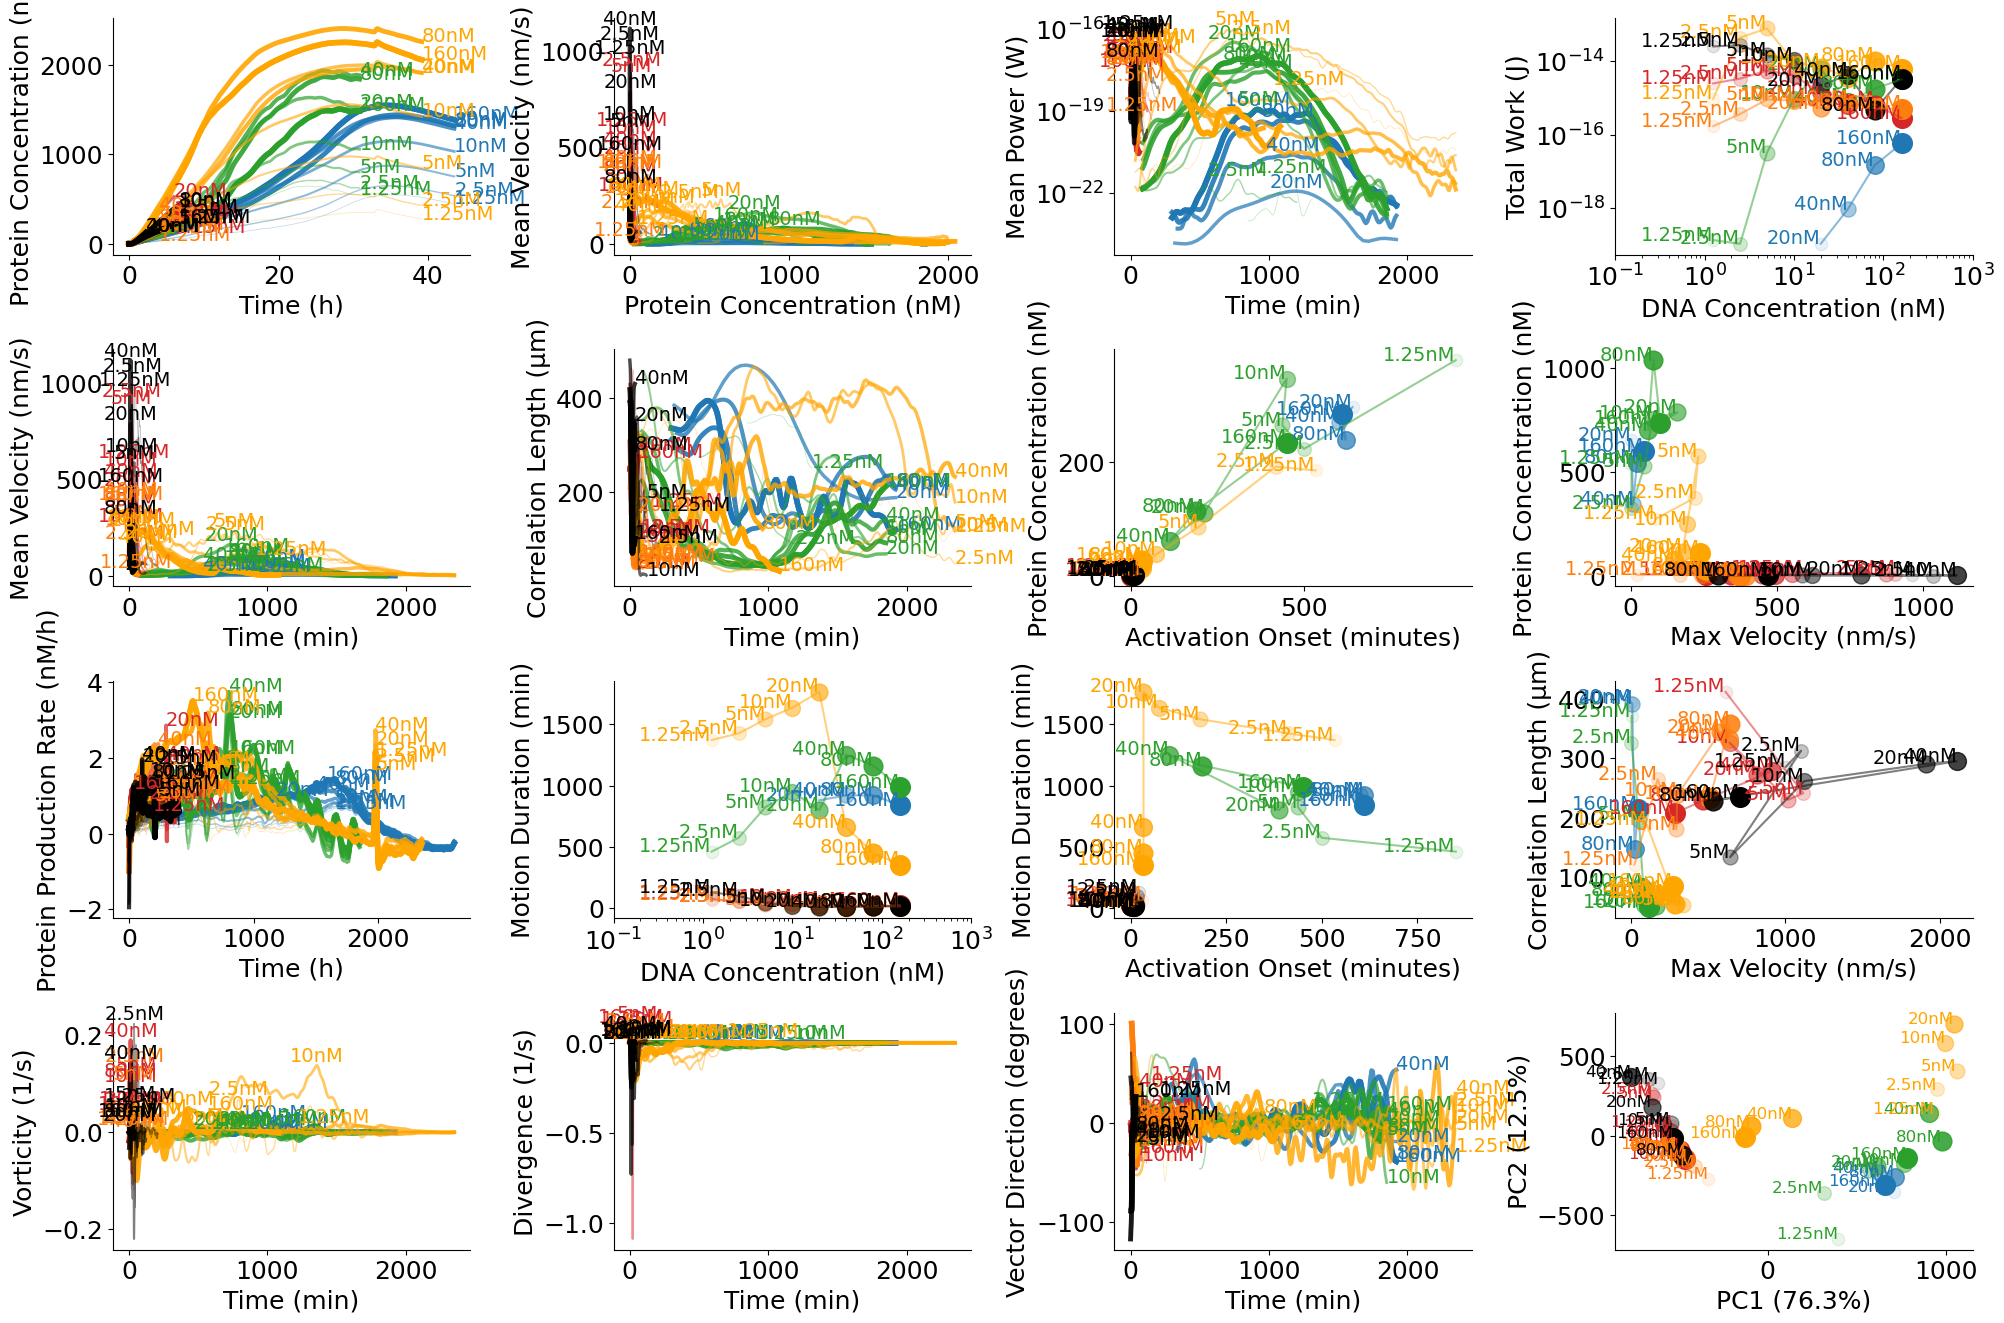

In [198]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FuncFormatter, LogLocator
from sklearn.decomposition import PCA

# ------------------------------
# Plotting functions (using a list of proteins)
# ------------------------------

def plot_protein_concentration_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                        color_map, velocity_threshold, time_unit, colored_DNAnM,
                                        display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    # Use full time range
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['Protein Concentration_nM', 'Time_h'])
            if df_filtered.empty:
                continue
            smoothed_conc = gaussian_filter1d(df_filtered['Protein Concentration_nM'], sigma=1)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered['Time_h'], smoothed_conc,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_filtered['Time_h'].iloc[-1], smoothed_conc[-1],
                        f'{dna_conc}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered['Time_h'], smoothed_conc, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel('Time (h)', fontsize=18)
    ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_power_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['power [W]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_power = gaussian_filter1d(df_filtered['power [W]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_power,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_power.argmax()
                t_peak = df_filtered[time_col].iloc[idx]
                p_peak = smoothed_power[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, p_peak, f'{dna_conc}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_power, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Mean Power (W)', fontsize=18)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_velocity_vs_protein_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['velocity magnitude [m/s]_mean', 'Protein Concentration_nM'])
            if df_filtered.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered['Protein Concentration_nM'], smoothed_vel,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_vel.argmax()
                x_peak = df_filtered['Protein Concentration_nM'].iloc[idx]
                y_peak = smoothed_vel[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(x_peak, y_peak, f'{dna_conc}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered['Protein Concentration_nM'], smoothed_vel, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel('Protein Concentration (nM)', fontsize=18)
    ax.set_ylabel('Mean Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_total_work_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                          color_map, velocity_threshold, time_unit, colored_DNAnM,
                                          display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        if protein in df['protein'].unique():
            pdata = df[df['protein'] == protein]
            dnas = []
            works = []
            for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
                sub = pdata[pdata['DNA nM'] == str(dna)]
                work_series = sub['work [J]_mean'].dropna()
                if not work_series.empty:
                    dnas.append(float(dna))
                    works.append(work_series.iloc[-1])
            if not works:
                continue
            alphas = np.linspace(1.0, 0.1, len(dnas))
            sizes = np.linspace(200, 80, len(dnas))
            for i, (x, y, alpha, size) in enumerate(zip(dnas, works, alphas, sizes)):
                ax.scatter(x, y, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(x, y, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, works, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA Concentration (nM)', fontsize=18)
    ax.set_ylabel('Total Work (J)', fontsize=18)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    if show_legends:
        ax.legend(loc='lower right', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_velocity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                               color_map, velocity_threshold, time_unit, colored_DNAnM,
                               display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                          .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_vel,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_vel.argmax()
                t_peak = df_filtered[time_col].iloc[idx]
                v_peak = smoothed_vel[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_vel, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Mean Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                    color_map, velocity_threshold, time_unit, colored_DNAnM,
                                    display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                          .dropna(subset=['correlation length [m]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_corr = gaussian_filter1d(df_filtered['correlation length [m]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_corr * 1e6,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_filtered[time_col].iloc[-1], smoothed_corr[-1] * 1e6,
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_corr * 1e6, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_activation_onset_vs_protein_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                     color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                     display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        activation_onsets = []
        protein_concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=1)
            df_sub = df_sub.copy()
            df_sub['smoothed_velocity'] = smoothed_vel
            peak_vel = df_sub['smoothed_velocity'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smoothed_velocity'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                conc = above['Protein Concentration_nM'].iloc[0]
                activation_onsets.append(onset)
                protein_concs.append(conc)
                dna_labels.append(f'{dna}nM')
        if activation_onsets:
            alphas = np.linspace(1.0, 0.1, len(activation_onsets))
            sizes = np.linspace(200, 80, len(activation_onsets))
            for i, (onset, conc, alpha, size, label) in enumerate(zip(activation_onsets, protein_concs, alphas, sizes, dna_labels)):
                ax.scatter(onset, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(onset, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(activation_onsets, protein_concs, color=color_map.get(protein, 'black'),
                    alpha=0.5, label=protein)
    ax.set_xlabel('Activation Onset (minutes)' if time_unit == 'min' else 'Activation Onset (hours)', fontsize=18)
    ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_vs_max_velocity(ax, df, proteins, dna_concentrations, time_col,
                                                 color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                 display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_vels = []
        concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', 'Protein Concentration_nM'])
            if df_sub.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            idx = smoothed_vel.argmax()
            max_vels.append(smoothed_vel[idx])
            concs.append(df_sub['Protein Concentration_nM'].iloc[idx])
            if float(dna).is_integer():
                dna_labels.append(f'{int(dna)}nM')
            else:
                dna_labels.append(f'{dna}nM')
        if max_vels:
            alphas = np.linspace(1.0, 0.1, len(max_vels))
            sizes = np.linspace(200, 80, len(max_vels))
            for i, (vel, conc, alpha, size, label) in enumerate(zip(max_vels, concs, alphas, sizes, dna_labels)):
                ax.scatter(vel, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(vel, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_vels, concs, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Velocity (nm/s)', fontsize=18)
    ax.set_ylabel('Protein Concentration (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_rate_of_change(ax, df, proteins, dna_concentrations, time_col,
                                                color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    # Use full time range (even if velocity data is missing)
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            # We only need protein concentration and time to compute dC/dt
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['Protein Concentration_nM', time_col])
            if df_filtered.empty:
                continue
            # Get arrays for concentration and time
            conc = df_filtered['Protein Concentration_nM'].values
            time_vals = df_filtered[time_col].values
            # Smooth the concentration data
            smoothed_conc = gaussian_filter1d(conc, sigma=1)
            # Compute the rate of change using np.gradient.
            # (Since time is in hours, the derivative is in nM per hour.)
            dC_dt = np.gradient(smoothed_conc, time_vals)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(time_vals, dC_dt,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                # Label at the peak of the curve
                peak_idx = dC_dt.argmax()
                ax.text(time_vals[peak_idx], dC_dt[peak_idx], f'{dna_conc}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(time_vals, dC_dt,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw, label=protein)
    ax.set_xlabel('Time (h)', fontsize=18)
    ax.set_ylabel('Protein Production Rate (nM/h)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_motion_duration_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                               color_map, velocity_threshold, time_unit, colored_DNAnM,
                                               display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        xs = []
        durations = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            df_sub = df_sub.copy()
            df_sub['smooth_vel'] = smooth_vel
            peak_vel = df_sub['smooth_vel'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smooth_vel'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                dur = above[time_col].iloc[-1] - onset
                xs.append(float(dna))
                durations.append(dur)
        if durations:
            alphas = np.linspace(1.0, 0.1, len(durations))
            sizes = np.linspace(200, 80, len(durations))
            for i, (x, dur, alpha, size) in enumerate(zip(xs, durations, alphas, sizes)):
                ax.scatter(x, dur, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(x, dur, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(xs, durations, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA Concentration (nM)', fontsize=18)
    ax.set_ylabel(f'Motion Duration ({time_unit})', fontsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_motion_duration_vs_activation_onset(ax, df, proteins, dna_concentrations, time_col,
                                             color_map, velocity_threshold, time_unit, colored_DNAnM,
                                             display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        onsets = []
        durations = []
        labels = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            df_sub = df_sub.copy()
            df_sub['smooth_vel'] = smooth_vel
            peak_vel = df_sub['smooth_vel'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smooth_vel'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                dur = above[time_col].iloc[-1] - onset
                onsets.append(onset)
                durations.append(dur)
                labels.append(f'{dna}nM')
        if onsets:
            alphas = np.linspace(1.0, 0.1, len(onsets))
            sizes = np.linspace(200, 80, len(onsets))
            for i, (o, d, alpha, size, label) in enumerate(zip(onsets, durations, alphas, sizes, labels)):
                ax.scatter(o, d, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(o, d, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(onsets, durations, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Activation Onset (minutes)' if time_unit == 'min' else 'Activation Onset (hours)', fontsize=18)
    ax.set_ylabel(f'Motion Duration ({time_unit})', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_velocity(ax, df, proteins, dna_concentrations, time_col,
                                        color_map, velocity_threshold, time_unit, colored_DNAnM,
                                        display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        corr_lengths = []
        max_vels = []
        xs = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['correlation length [m]_mean', 'velocity magnitude [m/s]_mean'])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            idx = smooth_vel.argmax()
            corr = df_sub['correlation length [m]_mean'].iloc[idx] * 1e6
            vel = smooth_vel[idx] * 1e9
            corr_lengths.append(corr)
            max_vels.append(vel)
            xs.append(float(dna))
        if corr_lengths:
            alphas = np.linspace(1.0, 0.1, len(corr_lengths))
            sizes = np.linspace(200, 80, len(corr_lengths))
            for i, (v, c, x, alpha, size) in enumerate(zip(max_vels, corr_lengths, xs, alphas, sizes)):
                ax.scatter(v, c, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(v, c, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(max_vels, corr_lengths, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Velocity (nm/s)', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vorticity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                           color_map, velocity_threshold, time_unit, colored_DNAnM,
                           display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['vorticity [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vort = gaussian_filter1d(df_sub['vorticity [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_vort,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_vort.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_vort[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_vort, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vorticity (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_divergence_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['divergence [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_div = gaussian_filter1d(df_sub['divergence [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_div,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_div.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_div[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_div, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Divergence (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vector_direction_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['vector direction [degrees]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_dir = gaussian_filter1d(df_sub['vector direction [degrees]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_dir,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_sub[time_col].iloc[-1], smooth_dir[-1],
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_dir, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vector Direction (degrees)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_PCA_clusters(ax, df, proteins, dna_concentrations, time_col,
                      color_map, velocity_threshold, time_unit, colored_DNAnM,
                      display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA concentration) combination, computes:
      - Maximum velocity (nm/s)
      - Protein concentration at max velocity
      - Total work (last valid work [J]_mean)
      - Correlation length at max velocity (µm)
      - Activation onset (first time smoothed velocity exceeds threshold)
      - Motion duration (time difference between last and first time above threshold)
      - Vorticity at max velocity (value of 'vorticity [1/s]_mean' at index of max velocity)
      - Divergence at max velocity (value of 'divergence [1/s]_mean' at index of max velocity)
      - Max power (maximum value of 'power [W]_mean' in the data)
      
    Performs PCA on these nine features and plots the first two principal components.
    Within each protein, a gradient of alphas and marker sizes is applied.
    """
    new_fig = False
    feature_list = []
    labels = []      # DNA concentration label
    prot_labels = [] # protein label

    for protein in proteins:
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))]
            if sub.empty:
                continue
            # Drop rows missing any required columns
            sub = sub.dropna(subset=['velocity magnitude [m/s]_mean', 
                                      'Protein Concentration_nM', 
                                      'work [J]_mean', 
                                      'correlation length [m]_mean',
                                      'vorticity [1/s]_mean',
                                      'divergence [1/s]_mean',
                                      'power [W]_mean',
                                      time_col])
            if sub.empty:
                continue
            # Smooth velocity data
            smooth_vel = gaussian_filter1d(sub['velocity magnitude [m/s]_mean'], sigma=2)
            idx_max = np.argmax(smooth_vel)
            max_vel = smooth_vel[idx_max] * 1e9  # convert to nm/s
            prot_conc_at_max = sub['Protein Concentration_nM'].iloc[idx_max]
            total_work = sub['work [J]_mean'].dropna().iloc[-1]
            corr_length = sub['correlation length [m]_mean'].iloc[idx_max] * 1e6  # in µm
            # Additional parameters:
            vorticity_at_max = sub['vorticity [1/s]_mean'].iloc[idx_max]
            divergence_at_max = sub['divergence [1/s]_mean'].iloc[idx_max]
            max_power = np.max(sub['power [W]_mean'].dropna())
            # Activation onset: first time when smoothed velocity exceeds threshold * max velocity
            thresh = velocity_threshold * smooth_vel[idx_max]
            above = sub[smooth_vel >= thresh]
            if above.empty:
                continue
            activation_onset = above[time_col].iloc[0]
            # Motion duration: difference between last and first time above threshold
            motion_duration = above[time_col].iloc[-1] - activation_onset

            # Create a feature vector with 9 features
            features = [max_vel, prot_conc_at_max, total_work, corr_length,
                        activation_onset, motion_duration, vorticity_at_max, divergence_at_max, max_power]
            feature_list.append(features)
            labels.append(f'{dna}nM')
            prot_labels.append(protein)
    if not feature_list:
        print("No data available for PCA.")
        return

    X = np.array(feature_list)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    explained = pca.explained_variance_ratio_
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
    # Group points by protein and apply gradient for alpha and marker size
    unique_prots = sorted(list(set(prot_labels)))
    for prot in unique_prots:
        indices = [i for i, p in enumerate(prot_labels) if p == prot]
        group_len = len(indices)
        group_alphas = np.linspace(1.0, 0.1, group_len)
        group_sizes = np.linspace(200, 80, group_len)
        for j, idx in enumerate(indices):
            x, y = X_pca[idx]
            ax.scatter(x, y, color=color_map.get(prot, 'black'),
                       s=group_sizes[j], alpha=group_alphas[j])
            if display_dna_text:
                ax.text(x, y, labels[idx], fontsize=12, ha='right', color=color_map.get(prot, 'black'))
    ax.set_xlabel(f'PC1 ({explained[0]*100:.1f}%)', fontsize=18)
    ax.set_ylabel(f'PC2 ({explained[1]*100:.1f}%)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if show_legends:
        for prot in unique_prots:
            ax.scatter([], [], color=color_map.get(prot, 'black'), label=prot)
        ax.legend(fontsize=16)
    if new_fig:
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

# ------------------------------
# Master function
# ------------------------------

def generate_plots_master(df, proteins, dna_concentrations, output_dir,
                          velocity_threshold=0.2, time_unit='h', colored_DNAnM=True,
                          combined_plots=False, display_dna_text=True, show_legends=True,
                          plots_to_include=None, grid_size=(3,5), fig_size=(6,6)):
    """
    Generates selected plots from the DataFrame.
    
    Parameters:
      df: DataFrame with experimental data.
      proteins: list of proteins to plot.
      dna_concentrations: list of DNA concentrations (nM).
      output_dir: directory to save plots.
      velocity_threshold: threshold for velocity-dependent computations.
      time_unit: 'min' or 'h'.
      colored_DNAnM: flag to color DNA labels by protein.
      combined_plots: if True, all plots are combined in one grid.
      display_dna_text: if True, add DNA concentration labels on the plots.
      show_legends: if True, display legends; otherwise do not show legends.
      plots_to_include: list of keys for which plots to produce.
      grid_size: tuple (rows, cols) for combined plots.
      fig_size: size (width, height) for each individual plot.
    """
    color_map = {
        'A': '#1f77b4', 'B': '#7f7f7f', 'C': '#2ca02c', 'D': '#d62728',
        'E': '#9467bd', 'F': '#8c564b', 'G': '#e377c2', 'H': '#ff7f0e',
        'ThTr': 'orange', 'AcSu2': '#d62728', 'DiPu': '#9467bd', 'Blesto': '#8c564b'
    }
    time_col = 'Time_min' if time_unit == 'min' else 'Time_h'
    proteins_str = '_'.join(proteins)
    dna_output_dir = os.path.join(output_dir, f'{proteins_str}_Full_Range')
    os.makedirs(dna_output_dir, exist_ok=True)
    
    plot_functions = {
        'Protein_Concentration_vs_Time': plot_protein_concentration_vs_time,
        'Mean_Velocity_vs_Protein_Concentration': plot_mean_velocity_vs_protein_concentration,
        'Mean_Power_vs_Time': plot_mean_power_vs_time,
        'Total_Work_vs_DNA_Concentration': plot_total_work_vs_dna_concentration,
        'Mean_Velocity_vs_Time': plot_mean_velocity_vs_time,
        'Correlation_Length_vs_Time': plot_correlation_length_vs_time,
        'Activation_Onset_vs_Protein_Concentration': plot_activation_onset_vs_protein_concentration,
        'Protein_Concentration_vs_Max_Velocity': plot_protein_concentration_vs_max_velocity,
        'Protein_Concentration_Rate_of_Change': plot_protein_concentration_rate_of_change,
        'Motion_Duration_vs_DNA_Concentration': plot_motion_duration_vs_dna_concentration,
        'Motion_Duration_vs_Activation_Onset': plot_motion_duration_vs_activation_onset,
        'Correlation_Length_vs_Velocity': plot_correlation_length_vs_velocity,
        'Vorticity_vs_Time': plot_vorticity_vs_time,
        'Divergence_vs_Time': plot_divergence_vs_time,
        'Vector_Direction_vs_Time': plot_vector_direction_vs_time,
        'PCA_Clusters': plot_PCA_clusters
    }
    plot_filenames = {
        'Protein_Concentration_vs_Time': 'Protein_Concentration_vs_Time.svg',
        'Mean_Power_vs_Time': 'Mean_Power_vs_Time.svg',
        'Mean_Velocity_vs_Protein_Concentration': 'Mean_Velocity_vs_Protein_Concentration.svg',
        'Total_Work_vs_DNA_Concentration': 'Total_Work_vs_DNA_Concentration.svg',
        'Mean_Velocity_vs_Time': 'Mean_Velocity_vs_Time.svg',
        'Correlation_Length_vs_Time': 'Correlation_Length_vs_Time.svg',
        'Activation_Onset_vs_Protein_Concentration': 'Activation_Onset_vs_Protein_Concentration.svg',
        'Protein_Concentration_vs_Max_Velocity': 'Protein_Concentration_vs_Max_Velocity.svg',
        'Protein_Concentration_Rate_of_Change': 'Protein_Concentration_Rate_of_Change.svg',
        'Motion_Duration_vs_DNA_Concentration': 'Motion_Duration_vs_DNA_Concentration.svg',
        'Motion_Duration_vs_Activation_Onset': 'Motion_Duration_Work_vs_Activation_Onset.svg',
        'Correlation_Length_vs_Velocity': 'Correlation_Length_vs_Velocity.svg',
        'Vorticity_vs_Time': 'Vorticity_vs_Time.svg',
        'Divergence_vs_Time': 'Divergence_vs_Time.svg',
        'Vector_Direction_vs_Time': 'Vector_Direction_vs_Time.svg',
        'PCA_Clusters': 'PCA_Clusters.svg'
    }
    if plots_to_include is None:
        plots_to_include = list(plot_functions.keys())
    
    if combined_plots:
        rows, cols = grid_size
        fig, axes = plt.subplots(rows, cols, figsize=(cols * fig_size[0], rows * fig_size[1]),
                                 gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
        axes = axes.flatten()
        current_ax_index = 0
    
    for key, func in plot_functions.items():
        if key in plots_to_include:
            if combined_plots:
                ax = axes[current_ax_index]
                current_ax_index += 1
            else:
                ax = None
            func(ax, df, proteins, dna_concentrations, time_col,
                 color_map, velocity_threshold, time_unit, colored_DNAnM, display_dna_text,
                 show_legends, dna_output_dir, plot_filenames[key], fig_size)
    if combined_plots:
        combined_filename = os.path.join(dna_output_dir, 'Combined_Plots.svg')
        fig.savefig(combined_filename, dpi=500)
        plt.show()


# ------------------------------
# Example usage
# ------------------------------

if __name__ == '__main__':
    # Suppose df_copy is your DataFrame loaded previously.
    titrations = [160 / (2 ** i) for i in range(11)]
    titrations = [int(t) if t.is_integer() else t for t in titrations][:8]
    print("Titrations:", titrations)
    
    plots_to_include = [
        'Protein_Concentration_vs_Time',
        'Mean_Power_vs_Time',
        'Mean_Velocity_vs_Protein_Concentration',
        'Total_Work_vs_DNA_Concentration',
        'Mean_Velocity_vs_Time',
        'Correlation_Length_vs_Time',
        'Activation_Onset_vs_Protein_Concentration',
        'Protein_Concentration_vs_Max_Velocity',
        'Protein_Concentration_Rate_of_Change',
        'Motion_Duration_vs_DNA_Concentration',
        'Motion_Duration_vs_Activation_Onset',
        'Correlation_Length_vs_Velocity',
        'Vorticity_vs_Time',
        'Divergence_vs_Time',
        'Vector_Direction_vs_Time',
        'PCA_Clusters'
    ]
    
    filters = [
        ('A', '160', 300, 32*60),
        ('A', '80', 300, 32*60),
        ('A', '40', 340, 32*60),
        ('A', '20', 300, 32*60),

        ('D', '160', 1, 60),
        ('D', '80', 1, 60),
        ('D', '40', 1, 60),
        ('D', '20', 1, 60),
        ('D', '10', 3, 80),
        ('D', '5', 5, 120),
        ('D', '2.5', 10, 150),
        ('D', '1.25', 15, 150),

        ('C', '160', 80, 32*60),
        ('C', '80', 80, 32*60),
        ('C', '40', 80, 32*60),
        ('C', '20', 80, 32*60),
        ('C', '10', 80, 32*60),
        ('C', '5', 80, 32*60),
        ('C', '2.5', 500, 20*60),
        ('C', '1.25', 14*60, 22*60),

        ('H', '160', 8, 60),
        ('H', '80', 2, 60),
        ('H', '40', 7, 60),
        ('H', '20', 2, 60),
        ('H', '10', 8, 100),
        ('H', '5', 10, 100),
        ('H', '2.5', 10, 100),
        ('H', '1.25', 30, 100),

        ('ThTr', '160', 30, 18*60),
        ('ThTr', '80', 30, 16*60),
        ('ThTr', '40', 30, 42*60),
        ('ThTr', '20', 30, 6000),
        ('ThTr', '10', 30, 6000),
        ('ThTr', '5', 30, 6000),
        ('ThTr', '2.5', 30, 6000),
        ('ThTr', '1.25', 30, 6000),

        ('HeAl', '160', 6, 36),
        ('HeAl', '80', 0, 36),
        ('HeAl', '40', 0, 36),
        ('HeAl', '20', 0, 36),
        ('HeAl', '10', 3, 120),
        ('HeAl', '5', 3, 120),
        ('HeAl', '2.5', 3, 210),
        ('HeAl', '1.25', 3, 210),
    ]
    
    proteins = [
        'A', 
        'C', 
        'D',
        'H', 
        'ThTr', 
        'HeAl'
        
        ]
    
    # Assume filter_and_replace_values is defined elsewhere.
    df_copy = filter_and_replace_values(df, filters)
    
    generate_plots_master(df_copy, proteins, dna_concentrations=titrations[:],
                          output_dir='../../../Downloads/Selected_Proteins_Plots',
                          velocity_threshold=0.2, time_unit='min', colored_DNAnM=True,
                          combined_plots=True, display_dna_text=True, show_legends=False,
                          plots_to_include=plots_to_include, grid_size=(4,4), fig_size=(6,4))

In [160]:
df.columns

Index(['condition', 'subcondition', 'time (s)', 'Time_min', 'Time_h',
       'Mean Intensity', 'Protein Concentration_ng_ul',
       'Protein Concentration_nM', 'Unnamed: 0', 'frame', 'x [m]_mean',
       'y [m]_mean', 'u [m/s]_mean', 'v [m/s]_mean', 'data type [-]_mean',
       'vorticity [1/s]_mean', 'velocity magnitude [m/s]_mean',
       'divergence [1/s]_mean', 'dcev [1]_mean', 'shear [1/s]_mean',
       'strain [1/s]_mean', 'vector direction [degrees]_mean',
       'correlation length [m]_mean', 'distance [m]_mean', 'power [W]_mean',
       'work [J]_mean', 'time (min)', 'time (h)', 'protein', 'DNA nM', 'kDa'],
      dtype='object')